# PACIENTI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import DictReader

In [2]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_exp = dict()
data_info = dict()

for row in reader:
    data_exp[row["Gene ID"]] = []
    for key, value in row.items():
        if key != "Gene ID" and key != "Gene Name":
            data_exp[row["Gene ID"]] += [float(value)]
            

fd = open("PR_pacienti2_opis.csv", "rt", encoding="utf-8")
reader = DictReader(fd)

for row in reader:
    data_info[row["Run"]] = dict()
    data_info[row["Run"]]["age"] = int(row["Sample Characteristic[age]"][:2])
    data_info[row["Run"]]["smoke"] = row["Sample Characteristic[clinical information]"]
    data_info[row["Run"]]["person"] = row["Sample Characteristic[individual]"]
    data_info[row["Run"]]["tissue"] = row["Sample Characteristic[sampling site]"]
    data_info[row["Run"]]["gender"] = row["Sample Characteristic[sex]"]
        

In [3]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_imenaGenov= dict()

for row in reader:
    data_imenaGenov[row["Gene ID"]] = row["Gene Name"]
data_imenaGenov

{'ENSG00000000003': 'TSPAN6',
 'ENSG00000000005': 'TNMD',
 'ENSG00000000419': 'DPM1',
 'ENSG00000000457': 'SCYL3',
 'ENSG00000000460': 'C1orf112',
 'ENSG00000000938': 'FGR',
 'ENSG00000000971': 'CFH',
 'ENSG00000001036': 'FUCA2',
 'ENSG00000001084': 'GCLC',
 'ENSG00000001167': 'NFYA',
 'ENSG00000001460': 'STPG1',
 'ENSG00000001461': 'NIPAL3',
 'ENSG00000001497': 'LAS1L',
 'ENSG00000001561': 'ENPP4',
 'ENSG00000001617': 'SEMA3F',
 'ENSG00000001626': 'CFTR',
 'ENSG00000001629': 'ANKIB1',
 'ENSG00000001630': 'CYP51A1',
 'ENSG00000001631': 'KRIT1',
 'ENSG00000002016': 'RAD52',
 'ENSG00000002079': 'MYH16',
 'ENSG00000002330': 'BAD',
 'ENSG00000002549': 'LAP3',
 'ENSG00000002586': 'CD99',
 'ENSG00000002587': 'HS3ST1',
 'ENSG00000002726': 'AOC1',
 'ENSG00000002745': 'WNT16',
 'ENSG00000002746': 'HECW1',
 'ENSG00000002822': 'MAD1L1',
 'ENSG00000002834': 'LASP1',
 'ENSG00000002919': 'SNX11',
 'ENSG00000002933': 'TMEM176A',
 'ENSG00000003056': 'M6PR',
 'ENSG00000003096': 'KLHL13',
 'ENSG00000003

In [4]:
fs = open("testfile1.csv", "rt")
reader = DictReader(fs)

data_stat = dict()

for row in reader:
    data_stat[row["geneId"]] = row["lung"]

data_stat_keys = set()
for key in data_stat:
    data_stat_keys.add(key)

In [5]:
data_presek = dict() #podatki za vse gene, ki so v obeh setih podatkov
for key, value in data_exp.items():
    if key in data_stat_keys:
        data_presek[key] = value
len(data_presek)

19503

**NE POGANJAJ -> traja ... -> rezultati so v datoteki GeniMatrika**

In [6]:
"""matrika = np.empty((0,670), dtype = float)

for key, value in data_presek.items():
    matrika = np.vstack((matrika, value))"""

'matrika = np.empty((0,670), dtype = float)\n\nfor key, value in data_presek.items():\n    matrika = np.vstack((matrika, value))'

In [7]:
data_geni = []
data_runs = []
for key in data_presek:
    data_geni += [key]

fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

for row in reader:
    for key in row:
        if key != "Gene ID" and key != "Gene Name":
            data_runs += [key]
    break

In [8]:
import pandas as pd

In [9]:
# Zapis generirane matrike

"""matrika_izpis = matrika
matrika_izpis = np.array(matrika_izpis, dtype = str)

headers = data_runs
levo = data_geni
df = pd.DataFrame(matrika_izpis, columns=headers, index=levo)
df.to_csv("GeniMatrika.csv")"""

'matrika_izpis = matrika\nmatrika_izpis = np.array(matrika_izpis, dtype = str)\n\nheaders = data_runs\nlevo = data_geni\ndf = pd.DataFrame(matrika_izpis, columns=headers, index=levo)\ndf.to_csv("GeniMatrika.csv")'

In [10]:
matrika_whole = np.loadtxt('GeniMatrika.csv', delimiter=",", skiprows=1, dtype = str)
matrika_whole

array([['ENSG00000000003', '3330.0', '3018.0', ..., '66.0', '310.0',
        '331.0'],
       ['ENSG00000000005', '9.0', '0.0', ..., '0.0', '2.0', '0.0'],
       ['ENSG00000000419', '1202.0', '1587.0', ..., '118.0', '568.0',
        '615.0'],
       ...,
       ['ENSG00000281613', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['ENSG00000281887', '0.0', '0.0', ..., '1.0', '0.0', '0.0'],
       ['ENSG00000281899', '0.0', '0.0', ..., '0.0', '0.0', '0.0']],
      dtype='<U15')

**METODA maska** se uporablja s spodajnavedenimi argumenti

In [11]:
#OMEJITVE
AGE_MIN = 0
AGE_MAX = 0
SMOKER = True #"smoker" / "ex-smoker" / "non-smoker"
PERSON = True #L400 - L881
TISSUE = True #"tumor tissue" / "non-malignant tissue"
GENDER = True #"male" / "female"


def isAge(run, AGE_MIN, AGE_MAX):
    run_age = int(data_info[run]["age"])
    return(AGE_MIN<=run_age and AGE_MAX>=run_age)

def isSmoker(run, SMOKER):
    return(data_info[run]["smoke"] == SMOKER or SMOKER == True)

def isPerson(run, PERSON):
    return(data_info[run]["person"] == PERSON or PERSON == True)
    
def isTissue(run, TISSUE):
    return(data_info[run]["tissue"] == TISSUE or TISSUE == True)

def isGender(run, GENDER):
    return(data_info[run]["gender"] == GENDER or GENDER == True)

def isALL(run, AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER):
    return(isAge(run, AGE_MIN, AGE_MAX) and isSmoker(run, SMOKER) and isPerson(run, PERSON) and
           isTissue(run, TISSUE) and isGender(run, GENDER))

def maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True):
    pacient_bool = np.full((1,len(pacienti)), True, dtype = bool)[0]
    for i in range(len(pacienti)):
        pacient_bool[i] = isALL(pacienti[i], AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER)
    return pacient_bool

def uporabiMasko(matrika, maska):
    matrika_p = matrika
    matrika_p = np.transpose(matrika_p)
    matrika_p = matrika_p[maska, :]
    return np.transpose(matrika_p)

In [12]:
matrika_lung = []
for key in data_presek:
    matrika_lung += [float(data_stat[key])]

**OBDELVAVA PODATKOV**

In [13]:
gn = open("VTSGgeni.csv", "rt")
reader = DictReader(gn)
geni5plus = []

for row in reader:
    geni5plus += [row["geneName"]]
geni5plus = set(geni5plus)

In [14]:
geni_bool = np.full((1,len(data_presek)), False, dtype=bool)[0]

for i in range(len(matrika_whole)):
    if data_imenaGenov[matrika_whole[i][0]] in geni5plus:
        geni_bool[i] = True
geni_bool

array([ True, False,  True, ..., False,  True, False])

In [15]:
matrika = matrika_whole[geni_bool, 1:]
matrika = np.array(matrika, dtype = float)
data_geni_red = matrika_whole[geni_bool, :1]

In [16]:
matrika.shape

(11469, 670)

In [17]:
matrika_norm = np.zeros((matrika.shape[0], matrika.shape[1]), dtype = float)

for i in range(len(matrika_norm)):
    for j in range(len(matrika_norm[i])):
        if matrika_lung[i]>0:
            matrika_norm[i][j] = matrika[i][j]/matrika_lung[i]
        else:
            matrika_norm[i][j] = 0.0

**matrika_norm** je matrika normaliziranih vrednosti glede na povprečno ekspresijo v pljučnem tkivu.
Vrednost 1 pomeni normalno, >1 povišano ekspresijo, <1 znižano ekspresijo

## ANALIZE PODATKOV

Tu se začnejo prave analize --> Spodaj naveden primer, kako jih delati.

Uporabljali bomo navadno matriko: **matrika** (stolpci pacienti, vrstice ekspresije genov)

Uporabljamo lahko tudi normalizirano matriko: **matrika_norm** (stolpci pacienti, vrstice ekspresije genov) - bolj primerna je normalizacija glede na kontrolno skupino pacientov.

Za reduciranje so atributih pacientov se uporablja maska: 

    maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True)
    
Karkoli ni **True** moraš navesti, kaj želiš gledat. Možnosti so navedene pri sami definiciji.

Če uporabljata matriko_norm, jo najprej prepišita v novo spremenljivko, da ne bomo izgubljali podatkov zaradi bedarij.

Analize označujta z zaporedno številko in dovolj opisnim imenom (npr. **0. Analiza ekspresije genov glede na spol**)

**matrika_norm** je matrika normaliziranih vrednosti glede na povprečno ekspresijo v pljučnem tkivu.
Vrednost 1 pomeni normalno, >1 povišano ekspresijo, <1 znižano ekspresijo

### 0. Analiza ekspresije genov glede na spol

**Prepis podatkov in začetne inicializaicije**

**KMeans - model**

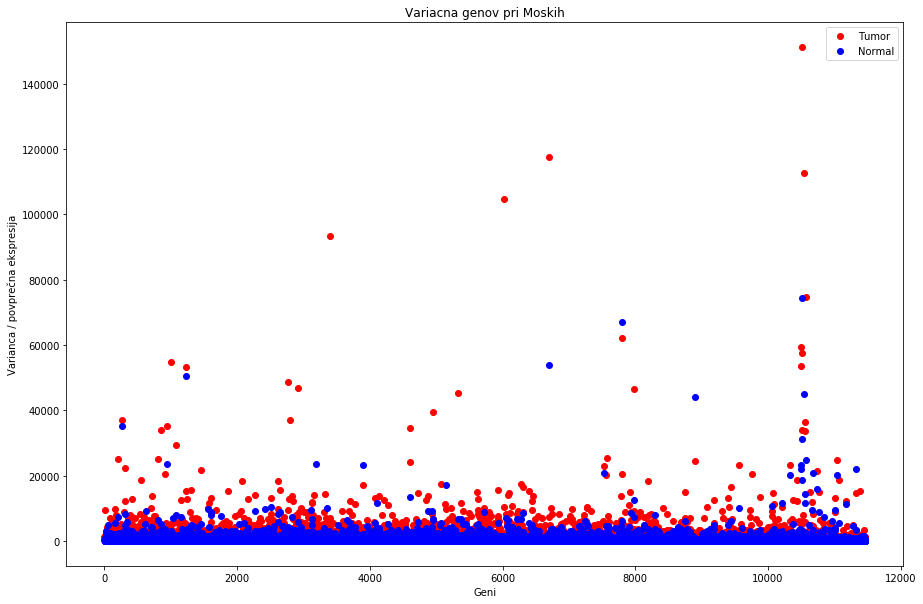

In [39]:
matrika_spol=matrika
matrika_moski_tumor = uporabiMasko(matrika_spol, maska(GENDER = "male", TISSUE = "tumor tissue"))
matrika_moski_normal = uporabiMasko(matrika_spol, maska(GENDER = "male", TISSUE = "non-malignant tissue"))

moski_tumor_var = []
for i in matrika_moski_tumor:
    if np.mean(i) == 0:
        moski_tumor_var += [np.var(i)/1.0];
    else:
        moski_tumor_var += [np.var(i)/np.mean(i)]

moski_normal_var = []
for i in matrika_moski_normal:
    if np.mean(i) == 0:
        moski_normal_var += [np.var(i)/1.0];
    else:
        moski_normal_var += [np.var(i)/np.mean(i)]

plt.figure(figsize=(15,10))
plt.plot(moski_tumor_var, "ro", label = "Tumor")
plt.plot(moski_normal_var, "bo", label = "Normal")
plt.xlabel("Geni")
plt.ylabel("Varianca / povprečna ekspresija")
plt.title("Variacna genov pri Moskih")
plt.legend()
plt.show()


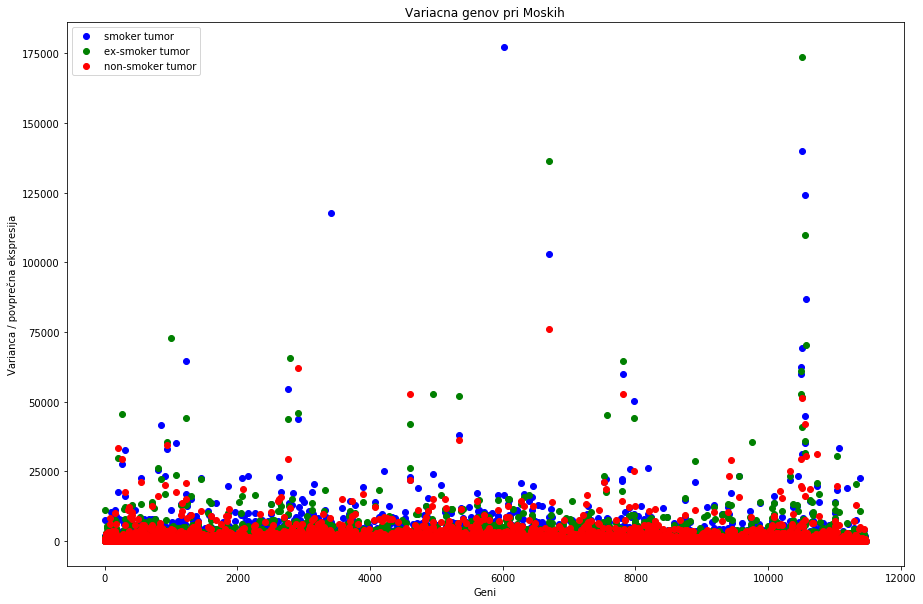

In [40]:
[maska(GENDER = "male", TISSUE = "tumor tissue")]
matrika_spolM=matrika
matrika_moski_tumor_smoker = uporabiMasko(matrika_spolM, maska(GENDER = "male", TISSUE = "tumor tissue", SMOKER="smoker"))
matrika_moski_tumor_exsmoker = uporabiMasko(matrika_spolM, maska(GENDER = "male", TISSUE = "tumor tissue", SMOKER="ex-smoker"))
matrika_moski_tumor_nonsmoker = uporabiMasko(matrika_spolM, maska(GENDER = "male", TISSUE = "tumor tissue", SMOKER="non-smoker"))

moski_tumor_smoker_var = []
for i in matrika_moski_tumor_smoker:
    if np.mean(i) == 0:
        moski_tumor_smoker_var += [np.var(i)/1.0];
    else:
        moski_tumor_smoker_var += [np.var(i)/np.mean(i)];

moski_tumor_exsmoker_var = []
for i in matrika_moski_tumor_exsmoker:
    if np.mean(i) == 0:
        moski_tumor_exsmoker_var += [np.var(i)/1.0];
    else:
        moski_tumor_exsmoker_var += [np.var(i)/np.mean(i)];

moski_tumor_nonsmoker_var = []
for i in matrika_moski_tumor_nonsmoker:
    if np.mean(i) == 0:
        moski_tumor_nonsmoker_var += [np.var(i)/1.0];
    else:
        moski_tumor_nonsmoker_var += [np.var(i)/np.mean(i)];    
    
plt.figure(figsize=(15,10))
plt.plot(moski_tumor_smoker_var, "bo", label = "smoker tumor")
plt.plot(moski_tumor_exsmoker_var, "go", label = "ex-smoker tumor")
plt.plot(moski_tumor_nonsmoker_var, "ro", label = "non-smoker tumor")
plt.xlabel("Geni")
plt.ylabel("Varianca / povprečna ekspresija")
plt.title("Variacna genov pri Moskih")
plt.legend()
plt.show()


In [41]:
moski_tumor_norm = np.zeros(matrika_moski_tumor.shape)

for i in range(len(matrika_moski_tumor)):
    povp = np.mean(matrika_moski_normal[i])
    for j in range(len(matrika_moski_tumor[i])):
        if povp == 0:
            moski_tumor_norm[i][j] = matrika_moski_tumor[i][j]/0.1
        else:
            moski_tumor_norm[i][j] = matrika_moski_tumor[i][j]/povp

from scipy.stats import t as student
import numpy as np

def meanStudent(seznamExp):
    xr = np.linspace(0,100, 1000)
    pars = student.fit(seznamExp)
    P_fit = [student.pdf(x, *pars) for x in xr ]
    return(P_fit.index(max(P_fit))*0.1)

def studentMain(ZELENA_matrika);

    maskaPovp = []
    MEJA = 1.5
    for i in range(len(ZELENA_matrika)):
        maskaPovp += [np.mean(ZELENA_matrika[i])]

    maskaPovp_bool = (np.array(maskaPovp) > MEJA)



    studentGenov = [] #Tale zna malo trajat
    for i in range(len(ZELENA_matrika)):
        if maskaPovp_bool[i]==False:
            studentGenov+=[MEJA]
        else:
            studentGenov+=[meanStudent(ZELENA_matrika[i])]

    studentGenov_sorted = (sorted(studentGenov)[::-1])[:20]
    top20genov = []

    for i in range(len(studentGenov)):
        if studentGenov[i] in studentGenov_sorted:
            top20genov+= [(data_geni[i], studentGenov[i])]

    return top20genov

studentMain(moski_tumor_norm)

[('ENSG00000027075', 5.4),
 ('ENSG00000042753', 7.2),
 ('ENSG00000077092', 4.3),
 ('ENSG00000088766', 5.7),
 ('ENSG00000102580', 5.4),
 ('ENSG00000102996', 5.9),
 ('ENSG00000115363', 6.9),
 ('ENSG00000121570', 4.6000000000000005),
 ('ENSG00000124302', 5.7),
 ('ENSG00000141968', 4.7),
 ('ENSG00000147676', 5.5),
 ('ENSG00000153814', 4.3),
 ('ENSG00000156042', 5.5),
 ('ENSG00000156050', 5.0),
 ('ENSG00000156475', 4.4),
 ('ENSG00000158234', 10.100000000000001),
 ('ENSG00000159289', 6.4),
 ('ENSG00000165478', 6.300000000000001),
 ('ENSG00000165495', 5.300000000000001),
 ('ENSG00000165548', 44.0)]

**3.točka**

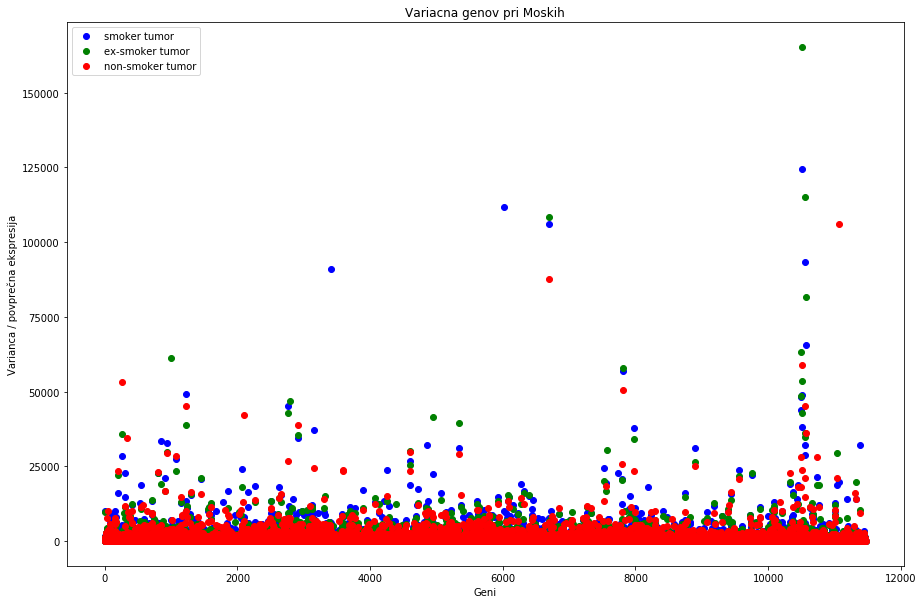

In [42]:
matrika_smokers = matrika
matrika_smoker = uporabiMasko(matrika_smokers, maska(SMOKER = "smoker", TISSUE = "tumor tissue"))
matrika_exsmoker = uporabiMasko(matrika_smokers, maska(SMOKER = "ex-smoker", TISSUE = "tumor tissue"))
matrika_nonsmoker = uporabiMasko(matrika_smokers, maska(SMOKER = "non-smoker", TISSUE = "tumor tissue"))

smoker_var = []
for i in matrika_smoker:
    if np.mean(i) == 0:
        smoker_var += [np.var(i)/1.0];
    else:
        smoker_var += [np.var(i)/np.mean(i)];

exsmoker_var = []
for i in matrika_exsmoker:
    if np.mean(i) == 0:
        exsmoker_var += [np.var(i)/1.0];
    else:
        exsmoker_var += [np.var(i)/np.mean(i)];

nonsmoker_var = []
for i in matrika_nonsmoker:
    if np.mean(i) == 0:
        nonsmoker_var += [np.var(i)/1.0];
    else:
        nonsmoker_var += [np.var(i)/np.mean(i)];

plt.figure(figsize=(15,10))
plt.plot(smoker_var, "bo", label = "smoker tumor")
plt.plot(exsmoker_var, "go", label = "ex-smoker tumor")
plt.plot(nonsmoker_var, "ro", label = "non-smoker tumor")
plt.xlabel("Geni")
plt.ylabel("Varianca / povprečna ekspresija")
plt.title("Variacna genov pri vseh")
plt.legend()
plt.show()

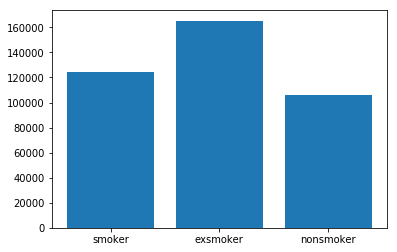

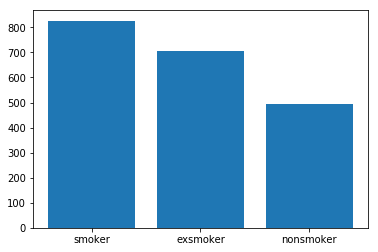

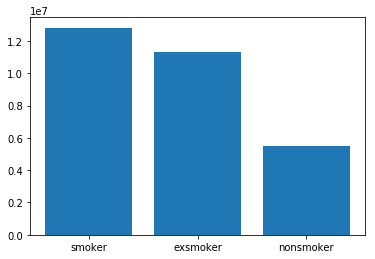

In [43]:
plt.figure()
plt.bar(["smoker","exsmoker","nonsmoker"],[max(smoker_var),max(exsmoker_var),max(nonsmoker_var)])
plt.xticks([0,1,2],["smoker","exsmoker","nonsmoker"])
plt.show()

plt.figure()
plt.bar(["smoker","exsmoker","nonsmoker"],[np.mean(matrika_smoker),np.mean(matrika_exsmoker),np.mean(matrika_nonsmoker)])
plt.xticks([0,1,2],["smoker","exsmoker","nonsmoker"])
plt.show()

plt.figure()
plt.bar(["smoker","exsmoker","nonsmoker"],[np.var(matrika_smoker),np.var(matrika_exsmoker),np.var(matrika_nonsmoker)])
plt.xticks([0,1,2],["smoker","exsmoker","nonsmoker"])
plt.show()
